In [13]:
''' Import libraries '''
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from IPython.display import display

In [14]:
''' Load image using OpenCV '''
# Upload the LMS image to Google Drive and point to its location.
# Note OpenCV reads image as BGR.
# image_directory = '/home/phw93/dev/calib/data/*.jpg'
image_directory = '/home/phw/dev/calib/data/*.jpg'
image_files = glob.glob(image_directory)
image_files = sorted(image_files)
images = []
gray_images = []
for image_file in image_files:
    image = cv2.imread(image_file)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0
    images.append(image)
    gray_images.append(gray_image)
    
images_len = len(gray_images)
# Normalize image to between 0 and 1.

checkboard = [8,6]
w, h = gray_images[0].shape
print(w, h)
print("image len: ", images_len)
print(checkboard[0], checkboard[1])

1920 1080
image len:  1137
8 6


float32
0.019607844 1.0


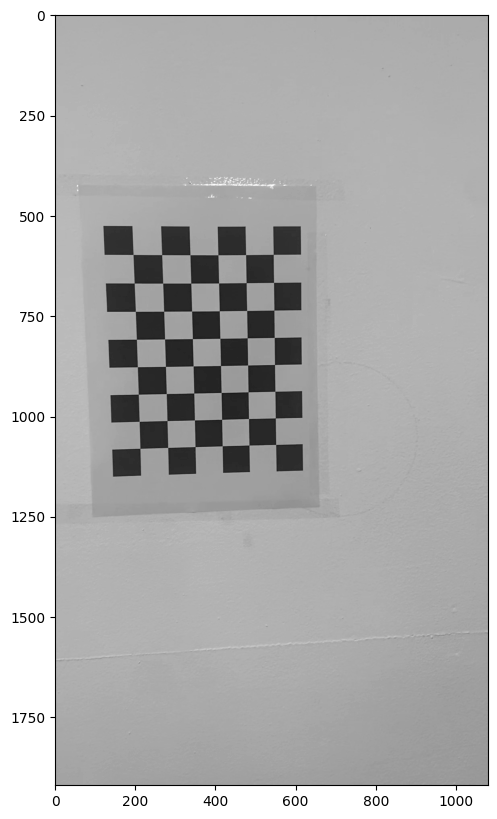

In [15]:
# Show output
print(gray_images[0].dtype)
print(np.min(gray_images[0]), np.max(gray_images[0]))
plt.figure(figsize=(10, 10))
plt.imshow(gray_images[5], cmap='gray')
plt.show()

In [16]:
# # Perform Sobel filtering along the x-axis, y-axis.
# arrIx = []
# arrIy = []
# sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# for gray_image in gray_images:
#     Ix = cv2.filter2D(gray_image, -1, sobel_x)
#     Iy = cv2.filter2D(gray_image, -1, sobel_y)
#     arrIx.append(Ix)
#     arrIy.append(Iy)

# print(len(arrIx))    

In [17]:
# plt.imshow(arrIx[111], cmap='gray')
# plt.imshow(arrIy[111], cmap='gray')

In [18]:
# extract corner & NMS
arrCorners = []

window_size = 3
half_size = window_size // 2

for gray_image in gray_images:
    max_corners = 100   # 최대 코너 개수
    quality_level = 0.01  # 코너 품질 임계값 (0 ~ 1 사이의 값)
    min_distance = 10  # 검출된 코너 간의 최소 거리
    mask = np.empty((0, 0), dtype=np.float32)
    corners = cv2.goodFeaturesToTrack(gray_image, max_corners, quality_level, min_distance, mask, blockSize=3, useHarrisDetector=True, k=0.04)
    arrCorners.append(corners)
    
for corners in arrCorners:
    print(len(corners))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
98
93
92
89
87
85
84
100
100
100
100
100
100
92
85
81
81
82
80
80
80
81
81
80
80
80
80
80
80
80
80
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
82
81
81
81
82
82
82
82
82
82
82
82
82
84
82
81
81
83
82
83
82
88
89
89
93
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
96
94
91
88
93
97
96
90
89
92
89
88
88
85
86
85
84
83
83
82
82
83
81
81
81
81
8

In [47]:
# draw corners
filtImg = []
filtCorners = []
for image, corners in zip(images, arrCorners):
    if(len(corners)>=(checkboard[0] * checkboard[1] + 3 * (checkboard[0] + checkboard[1]))):
        continue    
    temp = image.copy()
    mean = np.mean(corners, axis=0)
    variance = np.var(corners, axis=0)
    # 분산을 기준으로 일정 이내에 있는 포인트들 필터링
    threshold = 1.3  # 일정 분산 임계값 (조정 가능)
    filtered_points = []
    for corner in corners:
        if np.all(np.abs(corner - mean) <= threshold * np.sqrt(variance)):
            filtered_points.append(corner)
            x, y = corner[0, 0].astype(int), corner[0, 1].astype(int)
            cv2.drawMarker(temp, (x, y), color=(0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=5, thickness=1)
    if(len(filtered_points) == checkboard[0]*checkboard[1]):
        filtCorners.append(filtered_points)
        filtImg.append(temp)

178
48


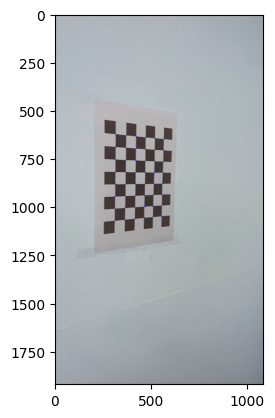

In [49]:
# 이미지 표시
plt.imshow(filtImg[11], cmap='gray')
print(len(filtCorners))
print(len(filtCorners[11]))